# Topics

## 1. Sound in Python -- "Jungle Sounds" Breakout
## 2. DFT and Power Spectrum -- Lecture Slides
## 3. DFT and Power Spectrum of synthesized sound signal  (Parseval's Theorem! -- Can use this as a doctest that checks this equality when calculating power spectrum)


In [2]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

import os
from scipy.io.wavfile import write
from IPython.lib.display import Audio


## Breakout: download animal sounds in wav format and make a class that make jungle sound for 5 - 10 sec.

- ### You can specify the kinds of animals
- ### how many of each
- ### how loud each should be
- ### optional: time-variation of an animal sound
- ### If you hear what sounds like noise: very likely it's due to sound saturation, meaning, sound level exceeding 2^16-1; a very likely scenario for the combined sound.


In [4]:
'''Complex numbers in numpy'''

import numpy as np
a = 1 + 2j
b = np.conj(a)
c = np.conj(b)
print(b)
print(c)
print(b*b.conj())

(1-2j)
(1+2j)
(5+0j)


## In what follows:
## tone_data: y_k
## ft = np.fft(tone_data): Y_n

In [5]:
%matplotlib inline
'''

fftfreg

from http://docs.scipy.org/doc/numpy/reference/generated/numpy.fft.fftfreq.html

numpy.fft.fftfreq(n, d=1.0)[source]
Return the Discrete Fourier Transform sample frequencies.

The returned float array f contains the frequency bin centers in cycles per unit of the sample spacing 
(with zero at the start). For instance, if the sample spacing is in seconds, then the frequency unit 
is cycles/second.

Given a window length n and a sample spacing d:

f = [0, 1, ...,   n/2-1,     -n/2, ..., -1] / (d*n)   if n is even
f = [0, 1, ..., (n-1)/2, -(n-1)/2, ..., -1] / (d*n)   if n is odd


Parameters:
n : int
Window length.
d : scalar, optional
Sample spacing (inverse of the sampling rate). Defaults to 1.
Returns:
f : ndarray
Array of length n containing the sample frequencies.


PAY ATTENTION TO THE MAXIMUM FREQUENCEY (NYQUIST FREQUENCY): 
IT IS *NOT* 1/sample_rate, BUT (1/2)(1/sample_rate)!!

'''


import matplotlib.pyplot as plt
import numpy as np

sample_rate = 44100

duration = 2.


f = 440.
time_pts = np.linspace(0, duration, duration*sample_rate)

amp = 2**13

amp_shift = 0  #16

tone_data = np.int16(amp*np.sin(np.pi*2*f*time_pts)) + amp_shift

# If you want to see a purely DC signal:
# DC = 4
# tone_data = np.int16(amp*np.sin(np.pi*2*f*time_pts)) + DC

if len(tone_data)%2:
    print("WARNING: length of data is NOT even.")
    print('\a')


#playsound(sample_rate, tone_data)

ft = np.fft.fft(tone_data)

freq = np.fft.fftfreq(tone_data.shape[0], d = 1/sample_rate)

N = len(tone_data)

print('N:', N)
#This shows the zero-freq term actually gives the sum, and is therefore always real for real data
# numpy documentation is wrong (which says that the zeroth term give!
print('Zero freqeuncy and zero frequence term:', freq[0], ft[0])
print('Zero freqeuncy and (zero frequence term)/N:', freq[0], ft[0]/N)
print('Mean of signal', tone_data.mean())

# Nyquist Frequency
print('Maximum frequency:', np.abs(freq).max())
print('Nyquist term  (note its reality):', ft[N//2])
print('Nyquist freq:', freq[N//2])
print('Freq before and after the Nyquist frequency:', freq[N//2-1], freq[N//2+1])
print("Terms before and after the Nyquist term (note they're cc of each other, but not perfectly so)", \
      ft[len(tone_data)//2-1], ft[len(tone_data)//2+1])


# numpy documentation is wrong:
print("N:", N)
print("Number of postive frequency terms (expect N/2):", np.sum(freq > 0))
print("Number of negative frequency terms (expect N/2 - 1):", np.sum(freq < 0))


N: 88200
Zero freqeuncy and zero frequence term: 0.0 0j
Zero freqeuncy and (zero frequence term)/N: 0.0 0j
Mean of signal 0.0
Maximum frequency: 22050.0
Nyquist term  (note its reality): (-298+5.62749846722e-12j)
Nyquist freq: -22050.0
Freq before and after the Nyquist frequency: 22049.5 -22049.5
Terms before and after the Nyquist term (note they're cc of each other, but not perfectly so) (-192.25381989+0.00684788195008j) (-192.25381989-0.00684788194629j)
N: 88200
Number of postive frequency terms (expect N/2): 44099
Number of negative frequency terms (expect N/2 - 1): 44100


/Users/shengyuanyuan/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:46: DeprecationWarning: object of type <class 'float'> cannot be safely interpreted as an integer.


## A[0] contains the zero-frequency term (the sum of the signal), which is always purely real for real inputs. Then A[1:n/2-1] contains the positive-frequency terms, and A[n/2:] contains the negative-frequency terms,  in order of decreasingly negative frequency. For an even number of input points, A[n/2] represents both positive and negative Nyquist frequency, and is also purely real for real input.

Modified from: http://docs.scipy.org/doc/numpy/reference/routines.fft.html


## Pop Quiz (without running the cell below):

### 1. What does the FT of a 440 Hz sinusoidal signal look like?

### 2. If I add a constant to the previous sound array, how do you think the FT would appear as?

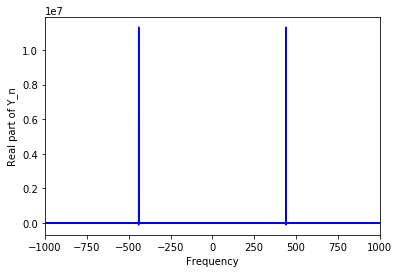

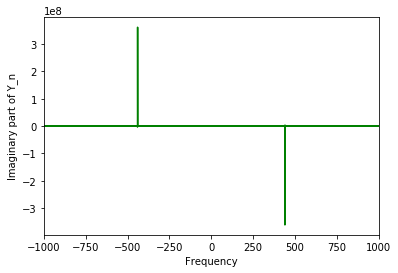

In [6]:
'''
If the average is not zero, note the DC signal

''' 

# illustrate how freq is arranged before argsort, and explain the purpose of np.argsort()
# idx = np.argsort(freq)
# sp = sp[idx]
# freq = freq[idx]


plt.figure()
plt.plot(freq, ft.real, 'b-')
plt.ylabel('Real part of Y_n')
plt.xlabel('Frequency')

#plt.xlim([420, 460])
plt.xlim([-1000, 1000])
plt.figure()
plt.plot(freq, ft.imag, 'g-')
#plt.xlim([420, 460])
plt.ylabel('Imaginary part of Y_n')
plt.xlabel('Frequency')

plt.xlim([-1000, 1000])
plt.show()


## Why are there a negative frequency and a positive frequency?

# Perhaps use a cosine wave?  May be easier to explain

## It's simply Euler's Forumla:
## $cos(2 \pi ft) = (e^{2i \pi ft} + e^{-2i\pi ft})/2$
## $e^{2i \pi ft} = cos(2 \pi ft) + i sin(2 \pi ft)$
## $e^{-2i \pi ft} = cos(2 \pi ft) - i sin(2 \pi ft)$

## Inverse FFT

max of the imaginary part 4.86538508667e-11


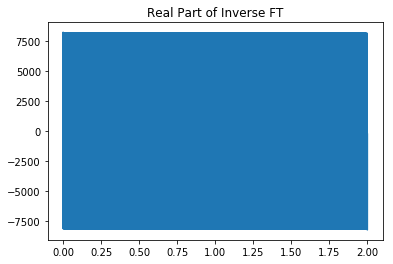

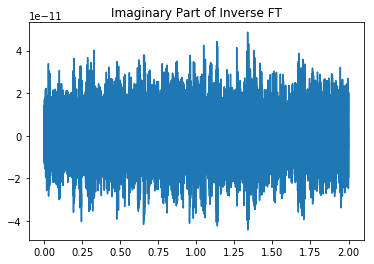

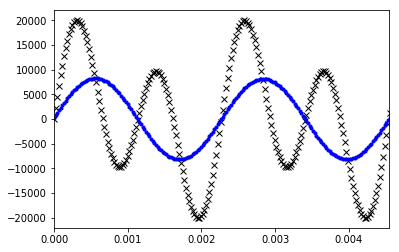

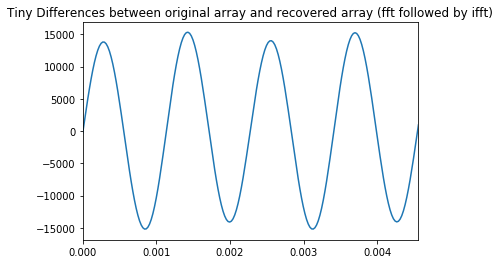

In [17]:
'''
Real part is not exactly zero due to numerical inaccuracy 
'''

tone_data_rec = np.fft.ifft(ft)

plt.figure()
plt.title('Real Part of Inverse FT')
plt.plot(time_pts, tone_data_rec.real)


plt.figure()
plt.title('Imaginary Part of Inverse FT')
plt.plot(time_pts, tone_data_rec.imag)
print('max of the imaginary part', tone_data_rec.imag.max())

tone_data_rec = np.int16(tone_data_rec.real)

plt.figure()
plt.plot(time_pts, tone_data, 'kx') 
plt.plot(time_pts, tone_data_rec, 'b.')
plt.xlim([0, 2/440.])

plt.figure()
plt.title('Tiny Differences between original array and recovered array (fft followed by ifft)')
plt.plot(time_pts, tone_data-tone_data_rec)
plt.xlim([0, 2/440.])

plt.show()

In [18]:
#playsound(sample_rate, tone_data)
playsound(sample_rate, tone_data_rec)

NameError: name 'playsound' is not defined

In [9]:
'''

Parseval's Theorem and Conservation of Energy.

Note I use ft for Y_n and y_k for tone_data.

'''

import matplotlib.pyplot as plt

sample_rate = 44100

duration = 2.


f = 440.
time_pts = np.linspace(0, duration, duration*sample_rate)

amp = 2**15

# previously I called this tone_data.  Since it corresponds to the y_k 
# in my lecture slides, I label it here y_k.
y_k = np.int16(amp*np.sin(np.pi*2*f*time_pts))

playsound(sample_rate, tone_data)

# previously I called this ft.  Since it corresponds to the Y_n 
# in my lecture slides, I label it here Yn.
Y_n = np.fft.fft(y_k)
freq = np.fft.fftfreq(y_k.shape[0], d = 1/sample_rate)


# Power spectrum
# checking Persarvel's Theorem
# B/c of the way np.fft is defined, the power spectrum is (|ft|/N)^2
N = len(y_k)
print('N =', N)
pwr = (Y_n * Y_n.conj())/N**2

if pwr.imag.max() > 1e-15:
    raise KeyboardInterrupt('Power is not real...something is wrong!!')

plt.figure()
plt.plot(freq, pwr.real, 'k-')
plt.xlim([-1000, 1000])


print("Power spectrum summed", pwr.sum())
print('Sum of data squared divided by N: {:g}'.format((y_k**2).sum()/N))
print('Sum of data squared divided by N: {:g}'.format((y_k.astype(np.float)**2).sum()/N))



/Users/shengyuanyuan/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:17: DeprecationWarning: object of type <class 'float'> cannot be safely interpreted as an integer.


NameError: name 'playsound' is not defined

In [10]:
'''
Largest uint16

For more:

https://docs.scipy.org/doc/numpy-1.14.0/user/basics.types.html

'''

import numpy as np

#2^16 - 1
a = np.uint16(65535)
b = np.uint16(a + 1)
print('largest uint16:', a)
print('(largest uint16) + 1:', b)

# but numpy has gotten better -- it now does a quiet conversion to 
# int64.  You can also cast it to int32
print('largest int16:', a + 1)
print('type(a+1)', type(a + 1))


largest uint16: 65535
(largest uint16) + 1: 0
largest int16: 65536
type(a+1) <class 'numpy.int64'>


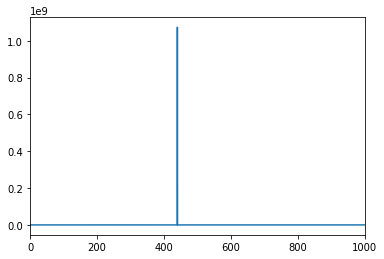

len(Pxx_den) 44101
Power spectral density integrated: 5.36844e+08


In [11]:
'''

Scipy's ready-made way of computing the (one-sided) power spectral density.

Note the increase in freq, df, is 1/T (T = duration).  If T = 2 sec, then 
f1 = 1/T (the fundamental frequency).  Recall f2 = 2*f1, f3 = 3*f1, etc.
Thus df = f1 = 1/T.

'''


from scipy import signal
f, Pwr_den = signal.periodogram(y_k, sample_rate)
# remember df = f1, the fundamental freq -- see docstring
df = 1./duration
plt.figure()
plt.plot(f, Pwr_den)
plt.xlim([0, 1000])
plt.show()
# This should be N/2 + 1 (b/c of the zero-frequency term)
print('len(Pxx_den)', len(Pwr_den))
# sum of Pxx_den * df
print('Power spectral density integrated: {:g}'.format((Pwr_den*df).sum()))

plt.show()

In [19]:
'''

Two-frequency signal

Say for ifft, one can change the ratio of 440 and 880 Hz amplitudes
-- this constitutes an equalizer

'''

import matplotlib.pyplot as plt
import numpy as np
from scipy import signal

sample_rate = 44100
#The following sample_rate may be better in showing the fft should be purely imaginary.
#sample_rate = 1048576.

duration = 2.
amp = 2**14

f = 440.
time_pts = np.linspace(0, duration, duration*sample_rate)


tone_data1 = amp*np.sin(np.pi*2*f*time_pts)


f = 440.*2
time_pts = np.linspace(0, duration, duration*sample_rate)
tone_data2 = amp*np.sin(np.pi*2*f*time_pts)

# equal weights
# tone_data1 *= 1/np.sqrt(2)
# tone_data1 *= 1/np.sqrt(2)

# unequal weights
tone_data1 *= 1/np.sqrt(5)
tone_data2 *= 2/np.sqrt(5)

tone_data =  np.int16( tone_data1 + tone_data2 )

playsound(sample_rate, tone_data)

# DFT
ft = np.fft.fft(tone_data)
freq = np.fft.fftfreq(tone_data.shape[0], d = 1/sample_rate)

plt.figure()
plt.plot(freq, ft.real, 'b-')
plt.xlim([-1000, 1000])
plt.figure()
plt.plot(freq, ft.imag, 'g-')
plt.xlim([-1000, 1000])
plt.show()

ft_sq = ft * ft.conj()
if ft_sq.imag.max() > 1e-15:
    raise KeyboardInterrupt('Power is not real...something is wrong!!')

plt.figure()
plt.plot(freq, ft_sq.real, 'k-')
plt.xlim([-1000, 1000])
plt.show()

# checking Persarvel's Theorem
# B/c of the way np.fft is defined, the power spectrum is |ft|^2/N^2
N = len(tone_data)
print('N =', N)
pwr = ft_sq.real.sum()/N**2
print("Power spectrum summed:{:g}".format(pwr.real))
# note the method .astype().  If the array is not converted to float
# integer summation will quickly reach the ceiling for 16-bit integers.
print('Sum of data squared divided by N:{:g}'.format((tone_data.astype(np.float)**2).sum()/N))


f, Pwr_den = signal.periodogram(tone_data, sample_rate)
df = 1./duration
plt.figure()
plt.plot(f, Pwr_den)
plt.xlim([0, 1000])
plt.show()
# This should be N/2 + 1 (b/c of the zero-frequency term)
print('len(Pwr_den)', len(Pwr_den))
# sum of Pxx_den * df
print('Power spectral density integrated: {:g}'.format((Pwr_den*df).sum()))

plt.show()


/Users/shengyuanyuan/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:22: DeprecationWarning: object of type <class 'float'> cannot be safely interpreted as an integer.
/Users/shengyuanyuan/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:29: DeprecationWarning: object of type <class 'float'> cannot be safely interpreted as an integer.


NameError: name 'playsound' is not defined

max of the imaginary part 5.7163343464e-11


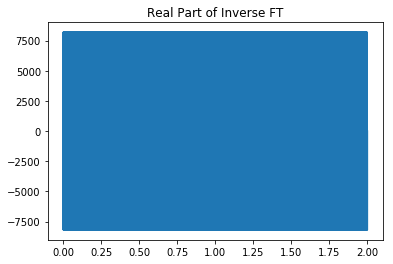

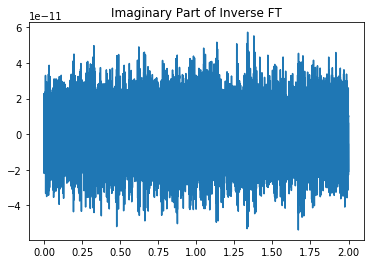

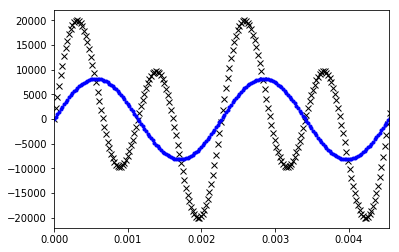

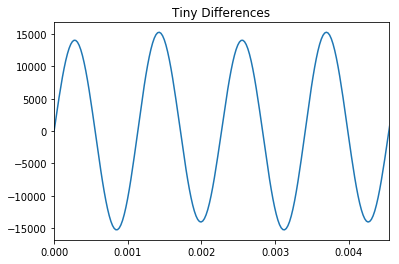

In [13]:
'''
Inverse DFT for a signal that has two frequencies

Note to self: should get 2 sets of 2 peaks at 2 frequencies

'''

tone_data_rec = np.fft.ifft(ft)

plt.figure()
plt.title('Real Part of Inverse FT')
plt.plot(time_pts, tone_data_rec.real)

plt.figure()
plt.title('Imaginary Part of Inverse FT')
plt.plot(time_pts, tone_data_rec.imag)
print('max of the imaginary part', tone_data_rec.imag.max())

# Rejecting the imaginary part
tone_data_rec = np.int16(tone_data_rec.real)

plt.figure()
plt.plot(time_pts, tone_data, 'kx') 
plt.plot(time_pts, tone_data_rec, 'b.')
plt.xlim([0, 2/440.])

plt.figure()
plt.title('Tiny Differences')
plt.plot(time_pts, tone_data-tone_data_rec)
plt.xlim([0, 2/440.])

plt.show()

In [20]:
#playsound(sample_rate, tone_data)
playsound(sample_rate, tone_data_rec)

NameError: name 'playsound' is not defined

## Pop Quiz:

### What do the first two lines of the next cell do?

max of the imaginary part 4.86538508667e-11


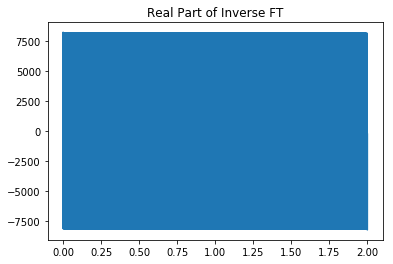

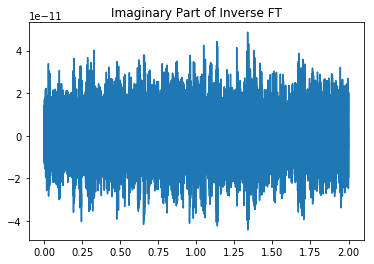

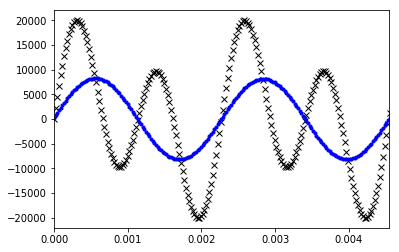

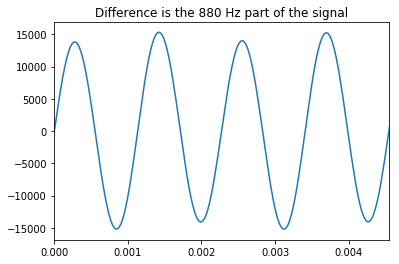

In [15]:
filt = np.abs(freq) < 500
ft *= filt

tone_data_rec = np.fft.ifft(ft)

plt.figure()
plt.title('Real Part of Inverse FT')
plt.plot(time_pts, tone_data_rec.real)


plt.figure()
plt.title('Imaginary Part of Inverse FT')
plt.plot(time_pts, tone_data_rec.imag)
print('max of the imaginary part', tone_data_rec.imag.max())

# Rejecting the imaginary part
tone_data_rec = np.int16(tone_data_rec.real)

plt.figure()
plt.plot(time_pts, tone_data, 'kx') 
plt.plot(time_pts, tone_data_rec, 'b.')
plt.xlim([0, 2/440.])

plt.figure()
plt.title('Difference is the 880 Hz part of the signal')
plt.plot(time_pts, tone_data-tone_data_rec)
plt.xlim([0, 2/440.])

plt.show()

In [16]:
'''
Now we get the pure A tone back
'''
playsound(sample_rate, tone_data_rec)

NameError: name 'playsound' is not defined

## Breakout: write functions get_tone() and plot_fourier().

## gen_tone(f, duration, sample_rate = 44100, amp = 2**13, play_sound = False) returns the numpy array for a tone with a given frequency (f) and given length (duration)

## plot_fourier(sample_rate, signal, freq_lim = 1000.) plots the real and imaginary parts of the signal, and returns ft and freq.

### - freq_lim specifies the limits within which to plot the FT

In [27]:
def gen_tone(f, duration, sample_rate = 44100, amp = 2**13, play_sound = False):
    time_pts = np.linspace(0, duration, duration*sample_rate)
    Atone_data = np.sin(np.pi*2*f*time_pts)*amp
    return Atone_data

def plot_fourier(sample_rate, signal, freq_lim = 1000.):
    ft = np.fft.fft(signal)

    freq = np.fft.fftfreq(signal.shape[0], d = 1/sample_rate)
    
    plt.figure()
    plt.plot(freq, ft.real, 'b-')
    plt.ylabel('Real part of Y_n')
    plt.xlabel('Frequency')

    #plt.xlim([420, 460])
    plt.xlim([-1000, 1000])
    plt.figure()
    plt.plot(freq, ft.imag, 'g-')
    #plt.xlim([420, 460])
    plt.ylabel('Imaginary part of Y_n')
    plt.xlabel('Frequency')

    plt.xlim([-1000, 1000])
    plt.show()
    return ft, freq

    

/Users/shengyuanyuan/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: DeprecationWarning: object of type <class 'float'> cannot be safely interpreted as an integer.
  


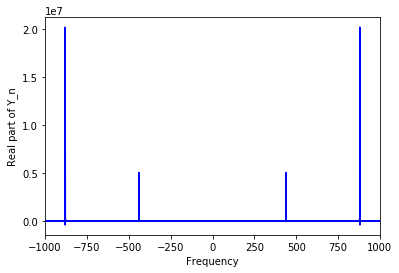

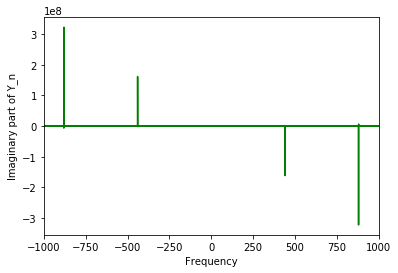

In [26]:
f = 440.
sample_rate = 44100
tone1 = gen_tone(f, 2.)
tone2 = gen_tone(f*2, 2.)

tone1 = np.float64(tone1)/np.sqrt(5.)
tone2 = 2*np.float64(tone2)/np.sqrt(5.)

tone = np.int16(tone1 + tone2)
# playsound(sample_rate, tone)
ft, freq = plot_fourier(sample_rate, tone)



## Breakout: write a function signal_rec(ft, freq, filt = None, xlo = 0, xhi = 0.02)

### - It take the FT of a signal, the freq array and returns the inverse FT.
### - xlo and xhi are limits along the x axis for plotting the recovered signal.
### - The default for the filter setting is no filter (filt = None).  But it can also take a boolean array as a filter.

In [28]:
def signal_rec(ft, freq, filt = None, xlo = 0, xhi = 0.02):
    import copy
    ft_filt = copy.copy(ft)
    try:
        len(filt)
    except:
        # that is, it's OK to not have a filter
        pass
    else:
        ft_filt *= filt

    tone_data_rec = np.fft.ifft(ft_filt)
    tone_data_rec = np.int16(tone_data_rec.real)

    f1 = freq[freq > 0].min() 
    dur = 1/f1
    
    time_pts = np.linspace(0, dur, len(ft))
    
    plt.figure()
    plt.title('Real Part of Inverse FT')
    plt.plot(time_pts, tone_data_rec.real, 'b-')


    plt.figure()
    plt.title('Imaginary Part of Inverse FT')
    plt.plot(time_pts, tone_data_rec.imag, 'r-')
    print('max of the imaginary part', tone_data_rec.imag.max())

    # Rejecting the imaginary part
    tone_data_rec = tone_data_rec.real

    plt.figure()
    plt.plot(time_pts, tone_data_rec, 'g')
    plt.xlim([xlo, xhi])


    plt.show()
    
    return tone_data_rec

max of the imaginary part 0


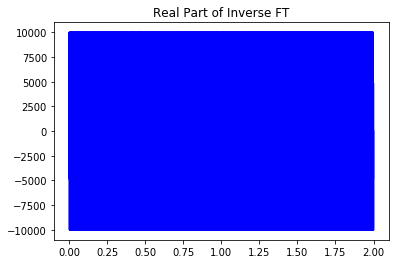

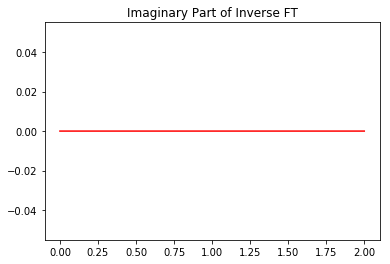

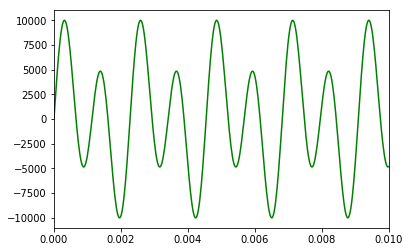

NameError: name 'playsound' is not defined

In [29]:
'''
try it with no filter
'''
tone_data_rec = signal_rec(ft, freq, filt = None, xhi = 0.01)
playsound(sample_rate, tone_data_rec)

In [ ]:
'''
Turn the filter on
'''
#ft_orig = ft
filt = np.abs(freq) < 500.
tone_data_rec = signal_rec(ft, freq, filt = filt)
playsound(sample_rate, tone_data_rec)

max of the imaginary part 0


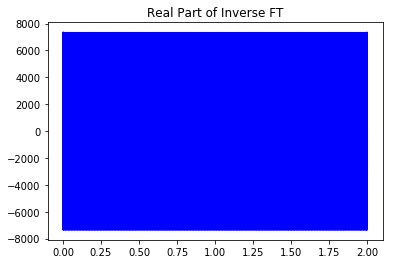

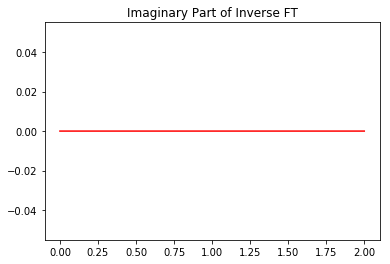

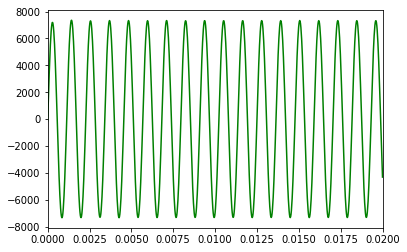

NameError: name 'playsound' is not defined

In [30]:
'''
Now pick out the high frequency
'''
filt = np.abs(freq) > 500.
tone_data_rec = signal_rec(ft, freq, filt = filt)
playsound(sample_rate, tone_data_rec)

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.pyplot as plt
from scipy.io.wavfile import read, write
import os
rate, barry_white = read("BarryWhite.wav")
#numpy.array(a[1],dtype=float)
#dolphin_snd = np.array(a[1], dtype = float)
print('rate', rate)
print('data type', barry_white.dtype)

# It has two columns: stereosound!
print(barry_white.shape)

start_time = 1
end_time = 5
duration = end_time - start_time
time_pts = np.linspace(0, duration, duration*rate)
shortBW = barry_white[start_time*rate: end_time*rate, :]
print(shortBW.shape)
plt.plot(time_pts, shortBW)


# just one channel
shortBW = shortBW[:, 0]
print(shortBW.shape)
print('data type:', shortBW.dtype)


playsound(rate, shortBW)

# reduce volume
shortBW_lo_vol = shortBW//4
playsound(rate, shortBW_lo_vol)

# Mac's afplay app doesn't like float
shortBW_float = shortBW/2
playsound(rate, shortBW_float)


plt.figure()
plt.plot(time_pts, shortBW)
plt.show()




In [31]:
'''
can we get Barry White back?


----> I should label all x and y axes on all plots

'''

ft, freq = plot_fourier(rate, shortBW, freq_lim = 5000.)
BW_rec = signal_rec(ft, freq, filt = None)
playsound(rate, BW_rec)

NameError: name 'rate' is not defined

max of the imaginary part 0


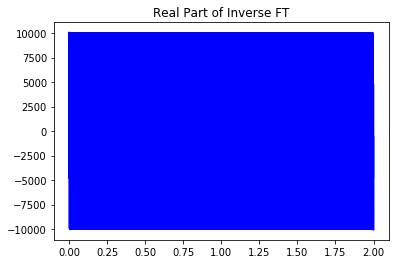

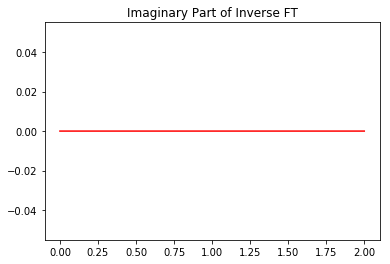

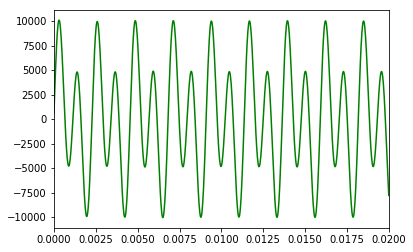

NameError: name 'playsound' is not defined

In [32]:
filt = np.abs(freq) < 1000.
BW_base = signal_rec(ft, freq, filt = filt)
playsound(rate, BW_base)

In [ ]:
filt = np.abs(freq) > 1000.
BW_hi_pitch = signal_rec(ft, freq, filt = filt)
playsound(rate, BW_hi_pitch)

In [ ]:
BW_mod = BW_base*2 + BW_hi_pitch
playsound(rate, shortBW)

playsound(rate, BW_mod)

## Note: Some sound players can only handle 16-bit integers.  Others, such as Audio from IPython is more flexible.  So you need to be careful!

In [ ]:
'''
You hear the first one but not the second
But Audio still works -- it may does a quiet conversion
'''
# plays -- as expected
playsound(rate, shortBW)

# doesn't play -- because on Mac, afplay can't handle 64-bit integer
playsound(rate, shortBW.astype(np.int64))

# Audio from IPython is flexible
Audio(shortBW.astype(np.int64), rate = rate)

## End of week 9-1